In [8]:
!pip install -U git+https://github.com/dunderlab/python-dunderlab.visualizations.git

  Cloning https://github.com/dunderlab/python-dunderlab.visualizations.git to /tmp/pip-req-build-zhhlm7vt
  Running command git clone --filter=blob:none --quiet https://github.com/dunderlab/python-dunderlab.visualizations.git /tmp/pip-req-build-zhhlm7vt
  Resolved https://github.com/dunderlab/python-dunderlab.visualizations.git to commit 4ef5ecef9ea456917e161b86b787909e769d2e0b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.0 MB/s eta 0:00:00:00:01
  Created wheel for dunderlab-visualizations: filename=dunderlab_visualizations-0.7-py3-none-any.whl size=24141 sha256=6c6cb777dfc234f2f2b930ea340fa214be967b695b5b0354c1e31dc9d1b22082
  Stored in directory: /tmp/pip-ephem-wheel-cache-mry24gfs/wheels/1d/91/2e/4e5463fc6e8b03c07fc1784b2c6830b59b936fac96c9f3d20c
Successfully built dunderlab-visualizations


In [9]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from dunderlab.visualizations.connectivities import CircosConnectivity, interact_connectivity

In [10]:
channels=['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
                     'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
                     'CP3', 'CP1', 'CPz', 'CP2', 'CP4',
                     'P1', 'Pz', 'P2', 'POz']

In [11]:
areas = {
    'Frontal': ['Fz','FCz','Cz'], 
    
    'Frontal R': ['FC2', 'FC4'],
    'Central R': ['C2', 'C4', 'C6'],
    'Centro Parietal R': ['CP2', 'CP4'],
    'Parietal R': ['P2'],
    
    'Posterior': ['CPz', 'Pz','POz'],
    
    'Parietal L': ['P1'],
    'Centro Parietal L': ['CP3', 'CP1'],
    'Central L': ['C5', 'C3', 'C1'],
    'Frontal L': ['FC3', 'FC1'],
}

In [12]:
datos_clase0 = []
datos_clase1 = []

for clase in [0, 1]:
    for subj in range(1, 11):
        ruta = f'/kaggle/input/te-random-model7/TE_Ramdon7_clase{clase}_{subj}.npy'
        try:
            data = np.load(ruta)
            if clase == 0:
                datos_clase0.append(data)
            else:
                datos_clase1.append(data)
        except FileNotFoundError:
            print(f'Archivo no encontrado: {ruta}')
            
matriz_clase0 = np.stack(datos_clase0, axis=0)
matriz_clase1 = np.stack(datos_clase1, axis=0)

print("Matriz clase 0:", matriz_clase0.shape)
print("Matriz clase 1:", matriz_clase1.shape)

Matriz clase 0: (10, 22, 22)
Matriz clase 1: (10, 22, 22)


In [13]:
matriz_clase0

array([[[ 0.        ,  0.84309566,  0.17449608, ...,  0.5366669 ,
          1.3008016 ,  0.17036803],
        [ 0.3276443 ,  0.        ,  0.25618488, ...,  0.953153  ,
          3.4705014 ,  0.9804278 ],
        [ 0.5967245 ,  0.8118621 ,  0.        , ...,  0.79400986,
          0.9718095 ,  1.1815257 ],
        ...,
        [ 1.3660089 ,  0.35486925,  0.43446955, ...,  0.        ,
          0.5743614 ,  0.8404473 ],
        [ 4.8512588 ,  0.4367142 ,  7.521173  , ...,  0.52194387,
          0.        ,  0.16142616],
        [ 0.51419127,  0.3406403 ,  1.5441775 , ...,  1.2975696 ,
          0.17617655,  0.        ]],

       [[ 0.        ,  0.23430747,  0.6314817 , ...,  0.2950738 ,
          0.46109137,  1.7069901 ],
        [ 0.51964843,  0.        ,  2.8833036 , ...,  3.3389592 ,
          0.6446052 ,  1.0844059 ],
        [ 2.9331796 ,  0.92007196,  0.        , ...,  2.3907719 ,
          1.0991218 ,  1.6619586 ],
        ...,
        [12.079003  ,  0.3811116 ,  2.2326684 , ...,  

In [14]:
matriz_clase0
promedio_class0 = np.mean(matriz_clase0, axis=0)

In [ ]:
conn_dir  = interact_connectivity(promedio_class0 , channels, areas)

In [ ]:
arguments  = conn_dir().params
arguments

In [ ]:
conn_dir().topoplot_reference(
    montage_name='standard_1005',
    size=10,
    fontsize=20,
    markersize=40,
    markerfacecolor='#ffffff88',
    markeredgecolor='#000000',
);

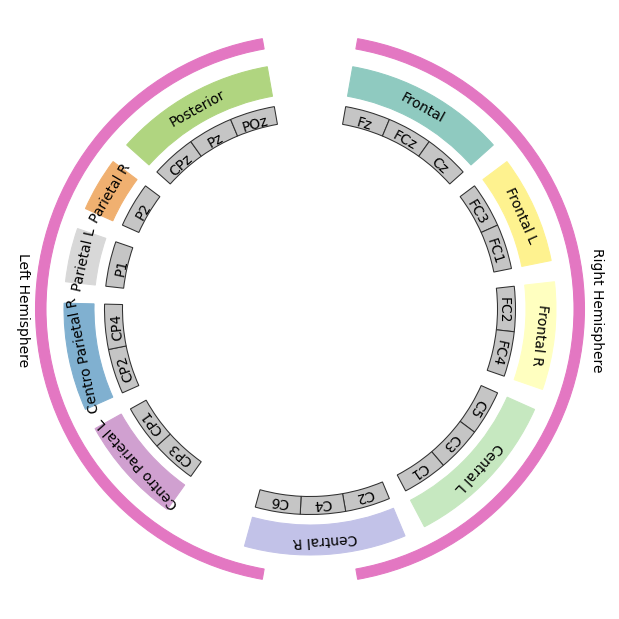

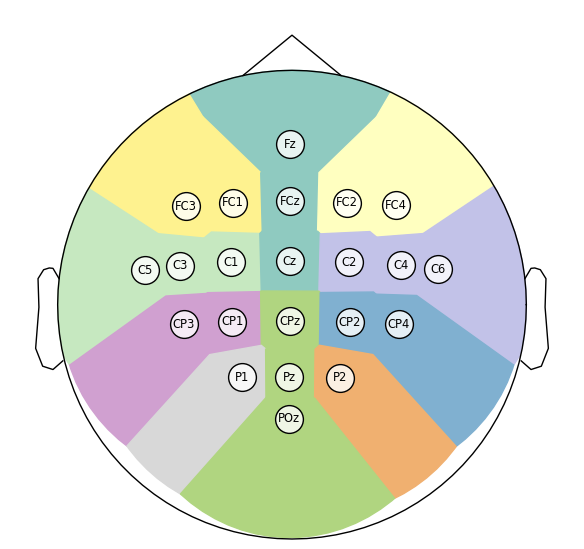

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from dunderlab.visualizations.connectivities import CircosConnectivity

# 1) tus canales y áreas...
channels = [ 'Fz','FC3','FC1','FCz','FC2','FC4',
             'C5','C3','C1','Cz','C2','C4','C6',
             'CP3','CP1','CPz','CP2','CP4',
             'P1','Pz','P2','POz' ]
areas = {
    'Frontal'           : ['Fz','FCz','Cz'],
    'Frontal L'         : ['FC3','FC1'],
    'Frontal R'         : ['FC2','FC4'],
    'Central L'         : ['C5','C3','C1'],
    'Central R'         : ['C2','C4','C6'],
    'Centro Parietal L' : ['CP3','CP1'],
    'Centro Parietal R' : ['CP2','CP4'],
    'Parietal L'        : ['P1'],
    'Parietal R'        : ['P2'],
    'Posterior'         : ['CPz','Pz','POz'],
}

# 2) tu ListedColormap de 10 colores en el orden de areas.keys()
area_colors = [
    '#8FCAC0','#FEF28F','#FFFFC0',
    '#C6E8C0','#C2C2E8','#D0A0D0',
    '#80B0D0','#D8D8D8','#F0B070',
    '#B0D580',
]
cmap = ListedColormap(area_colors)

# 3) matriz casi-cero pero con un pequeño epsilon (para no chocar con "max==0")
n = len(channels)
conn_mat = np.zeros((n,n))
conn_mat[0,0] = 1e-6

# 4) crea CircosConnectivity SIN normalizar colores internamente
conn = CircosConnectivity(
    connectivities   = conn_mat,
    channels         = channels,
    areas            = areas,
    areas_cmap       = cmap,
    threshold        = 2,            # >1, para que no haya arcos
    normalize_colors = False,        # <<— aquí
    size             = 6
)

# 5) ahora sí pinta tu topomap segmentado, sin líneas azules
ax = conn.topoplot_reference(
    montage_name    = 'standard_1005',
    size            = 6,
    fontsize        = 12,
    markersize      = 20,
    markerfacecolor = '#ffffffcc',
    markeredgecolor = '#000000'
)
plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from dunderlab.visualizations.connectivities import CircosConnectivity

# 1) Canales y áreas (idéntico a antes)
channels = [
    'Fz','FC3','FC1','FCz','FC2','FC4',
    'C5','C3','C1','Cz','C2','C4','C6',
    'CP3','CP1','CPz','CP2','CP4',
    'P1','Pz','P2','POz'
]
areas = {
    'Frontal'           : ['Fz','FCz','Cz'],
    'Frontal L'         : ['FC3','FC1'],
    'Frontal R'         : ['FC2','FC4'],
    'Central L'         : ['C5','C3','C1'],
    'Central R'         : ['C2','C4','C6'],
    'Centro Parietal L' : ['CP3','CP1'],
    'Centro Parietal R' : ['CP2','CP4'],
    'Parietal L'        : ['P1'],
    'Parietal R'        : ['P2'],
    'Posterior'         : ['CPz','Pz','POz'],
}

# 2) Colormap discreto de tus 10 colores (mismo orden de areas.keys())
area_colors = [
    '#8FCAC0', '#FEF28F', '#FFFFC0',
    '#C6E8C0', '#C2C2E8', '#D0A0D0',
    '#80B0D0', '#D8D8D8', '#F0B070',
    '#B0D580',
]
cmap = ListedColormap(area_colors)

# 3) Matriz “casi cero” con un pequeño epsilon en la diagonal
n = len(channels)
conn_mat = np.zeros((n, n))
conn_mat[0, 0] = 1e-6   # ahora c_max = 1e-6 > 0

# 4) Crea CircosConnectivity con threshold > 1 para que no pinte ningún arco
conn = CircosConnectivity(
    connectivities=conn_mat,
    channels=channels,
    areas=areas,
    areas_cmap=cmap,
    threshold=2,      # >1 unificado con las conectividades normalizadas ∈[0,1]
    size=6
)

# 5) Llama a topoplot_reference
ax = conn.topoplot_reference(
    montage_name='standard_1005',
    size=6,
    fontsize=12,
    markersize=20,
    markerfacecolor='#ffffffcc',
    markeredgecolor='#000000'
)

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.patches import Wedge
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.viz import plot_topomap

# 1) tus canales y colores
channels = [...]
areas     = {...}
area_colors = {...}        # extraído de tu inspección
zone_alpha  = 0.6          # igual que en dunderlab
margin      = 3            # igual que en dunderlab
montage     = mne.channels.make_standard_montage('standard_1005')
ch_pos_all  = montage.get_positions()['ch_pos']
pos         = np.array([ch_pos_all[ch][:2] for ch in channels])
head_radius = np.max(np.linalg.norm(pos, axis=1))

# 2) calcula ángulos y rangos idénticos al paquete
angles = np.degrees(np.arctan2(pos[:,1], pos[:,0]))
zone_angles = {}
for area, chs in areas.items():
    idx = [channels.index(ch) for ch in chs]
    a = angles[idx]
    mn, mx = np.min(a), np.max(a)
    # mismo ajuste de cruce de -180/180
    if mx - mn > 180:
        a2 = np.mod(a + 180, 360)
        mn2, mx2 = np.min(a2), np.max(a2)
        mn, mx = mn2-180, mx2-180
    zone_angles[area] = (mn - margin, mx + margin)

# 3) plotea
fig, ax = plt.subplots(1,1, figsize=(6,6))
# 3a) dibuja zonas idéntico a dunderlab
for area, (ang1, ang2) in zone_angles.items():
    w = Wedge((0,0), head_radius, ang1, ang2,
              facecolor=area_colors[area],
              alpha=zone_alpha,
              linewidth=0)
    ax.add_patch(w)

# 3b) contorno y electrodos
plot_topomap(np.zeros(len(channels)), pos,
             axes=ax, show=False,
             sensors=False, contours=0,
             outlines='head', extrapolate='local')
for ch, (x,y) in zip(channels, pos):
    ax.scatter(x, y, s=300,
               facecolor='#ffffffcc',
               edgecolor='k', zorder=10)
    ax.text(x, y, ch, ha='center', va='center',
            fontsize=12, zorder=20)

ax.set_axis_off()
plt.tight_layout()
plt.show()


# Clase 0

In [ ]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold': 0.3,
    'percentile': [95, 100],
    'show_emisphere': False,
    'offset': -1.5,  # Esto rota el círculo para alinear Frontal arriba
    # 'normalize_colors': False,
    # 'arcs_cmap': 'viridis',
})
CircosConnectivity(promedio_class0, channels, areas, **arguments_)

# plt.savefig("Model2_class0_.png", format="png", bbox_inches="tight")

# Clase 1

In [ ]:
matriz_clase1
promedio_class1 = np.mean(matriz_clase1, axis=0)

In [ ]:
arguments_ = arguments.copy()
arguments_.update({
    'threshold':0.3,
    'percentile': [95, 100],
    'show_emisphere': False,
    'offset': -1.5,  # Esto rota el círculo para alinear Frontal arriba
})
CircosConnectivity(promedio_class1, channels, areas, **arguments_)
plt.savefig("Model7_class1_.png", format="png", bbox_inches="tight")